In [53]:
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
plt.style.use('fivethirtyeight')


In [54]:
train=pd.read_csv('train_dataset.csv')
test=pd.read_csv('test_dataset.csv')

In [55]:
train.head()

用户编码  用户实名制是否通过核实  用户年龄  是否大学生客户  是否黑名单客户  \
0  a4651f98c82948b186bdcdc8108381b4            1    44        0        0   
1  aeb10247db4e4d67b2550bbc42ff9827            1    18        0        0   
2  5af23a1e0e77410abb25e9a7eee510aa            1    47        0        0   
3  43c64379d3c24a15b8478851b22049e4            1    55        0        0   
4  f1687f3b8a6f4910bd0b13eb634056e2            1    40        0        0   

   是否4G不健康客户  用户网龄（月）  用户最近一次缴费距今时长（月）  缴费用户最近一次缴费金额（元）  用户近6个月平均消费值（元）  ...  \
0          0      186                1            99.80          163.86  ...   
1          1        5                1            29.94          153.28  ...   
2          0      145                1            49.90          109.64  ...   
3          0      234                1            99.80           92.97  ...   
4          0       76                1            49.90           95.47  ...   

   当月是否景点游览  当月是否体育场馆消费  当月网购类应用使用次数  当月物流快递类应用使用次数  当月金融理财类应用使用总次数  \
0         1           1          713              0            2740   
1         0           0          414              0            2731   
2         0           0         3391              0               0   
3         1           1          500              0            1931   
4         1           0          522              0              64   

   当月视频播放类应用使用次数  当月飞机类应用使用次数  当月火车类应用使用次数  当月旅游资讯类应用使用次数  信用分  
0           7145            0            0             30  664  
1          44862            0            0              0  530  
2           4804            0            0              1  643  
3           3141            0            0              5  649  
4             59            0            0              0  648  

[5 rows x 30 columns]

In [56]:
def missing_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(
    columns={0:'Missing Values',1:'% of Total Values'})
    
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1]!=0].sort_values(
        '% of Total Values',ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_ren_columns

In [57]:
missing_values=missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 30 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [58]:
train["用户年龄"].describe()

count    50000.000000
mean        37.883440
std         11.613239
min          0.000000
25%         30.000000
50%         36.000000
75%         45.000000
max        111.000000
Name: 用户年龄, dtype: float64

In [59]:
train[(train["用户实名制是否通过核实"]<10)&(train["用户年龄"]>80)].T

102    \
用户编码             e6b0aedf951544a887401033077a8f87   
用户实名制是否通过核实                                     1   
用户年龄                                           86   
是否大学生客户                                         0   
是否黑名单客户                                         0   
是否4G不健康客户                                       0   
用户网龄（月）                                        35   
用户最近一次缴费距今时长（月）                                 1   
缴费用户最近一次缴费金额（元）                             29.94   
用户近6个月平均消费值（元）                              19.32   
用户账单当月总费用（元）                                   18   
用户当月账户余额（元）                                    30   
缴费用户当前是否欠费缴费                                    0   
用户话费敏感度                                         5   
当月通话交往圈人数                                       7   
是否经常逛商场的人                                       0   
近三个月月均商场出现次数                                    0   
当月是否逛过福州仓山万达                                    0   
当月是否到过福州山姆会员店                                   0   
当月是否看电影                                         0   
当月是否景点游览                                        0   
当月是否体育场馆消费                                      0   
当月网购类应用使用次数                                     0   
当月物流快递类应用使用次数                                   0   
当月金融理财类应用使用总次数                                  0   
当月视频播放类应用使用次数                                   0   
当月飞机类应用使用次数                                     0   
当月火车类应用使用次数                                     0   
当月旅游资讯类应用使用次数                                   0   
信用分                                           508   

                                            198    \
用户编码             7d690728b313425ca5e691a10df78aa9   
用户实名制是否通过核实                                     1   
用户年龄                                           81   
是否大学生客户                                         0   
是否黑名单客户                                         0   
是否4G不健康客户                                       0   
用户网龄（月）                                        17   
用户最近一次缴费距今时长（月）                                 0   
缴费用户最近一次缴费金额（元）                                 0   
用户近6个月平均消费值（元）                              59.67   
用户账单当月总费用（元）                                70.16   
用户当月账户余额（元）                                    30   
缴费用户当前是否欠费缴费                                    0   
用户话费敏感度                                         3   
当月通话交往圈人数                                      10   
是否经常逛商场的人                                       0   
近三个月月均商场出现次数                                    0   
当月是否逛过福州仓山万达                                    0   
当月是否到过福州山姆会员店                                   0   
当月是否看电影                                         0   
当月是否景点游览                                        0   
当月是否体育场馆消费                                      0   
当月网购类应用使用次数                                     0   
当月物流快递类应用使用次数                                   0   
当月金融理财类应用使用总次数                                  0   
当月视频播放类应用使用次数                                   0   
当月飞机类应用使用次数                                     0   
当月火车类应用使用次数                                     0   
当月旅游资讯类应用使用次数                                   0   
信用分                                           526   

                                            812    \
用户编码             140248c00cf14c51b26750b2e76b781e   
用户实名制是否通过核实                                     1   
用户年龄                                           98   
是否大学生客户                                         0   
是否黑名单客户                                         0   
是否4G不健康客户                                       0   
用户网龄（月）                                       113   
用户最近一次缴费距今时长（月）                                 0   
缴费用户最近一次缴费金额（元）                                 0   
用户近6个月平均消费值（元）                             165.35   
用户账单当月总费用（元）                                153.1   
用户当月账户余额（元）                                    80   
缴费用户当前是否欠费缴费                                    0   
用户话费敏感度       

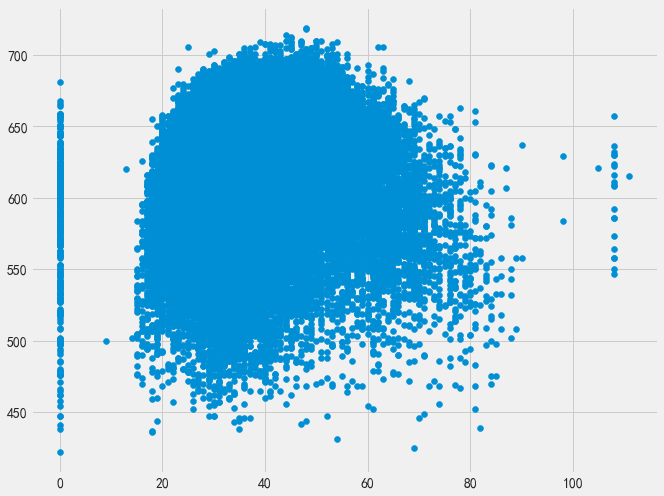

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(x=train['用户年龄'],y=train['信用分'])

## 小于10岁的存在异常值，290个0岁，1个8岁，后续考察如何处理

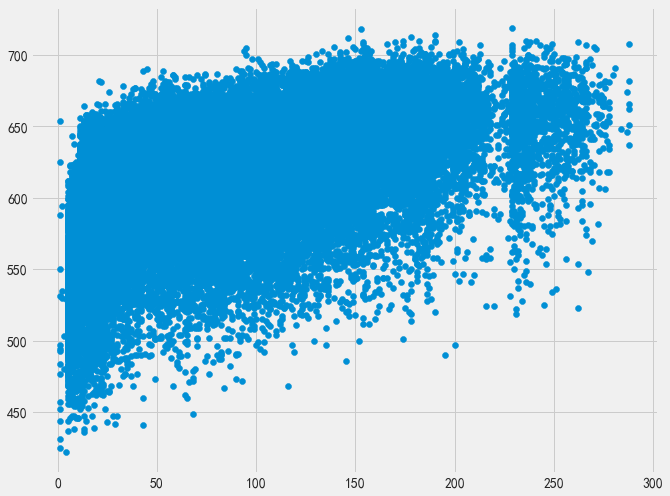

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(x=train['用户网龄（月）'],y=train['信用分'])

In [62]:
train['用户账单当月总费用（元）'].describe()

count    50000.000000
mean        99.575130
std         65.327335
min          0.000000
25%         52.675000
50%         89.620000
75%        133.945000
max       1164.290000
Name: 用户账单当月总费用（元）, dtype: float64

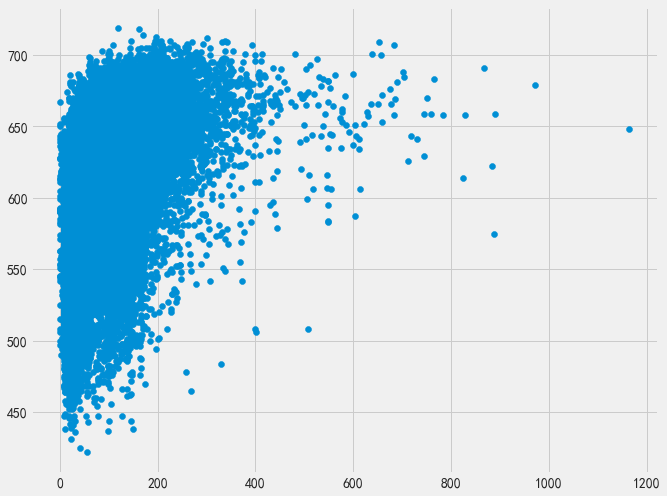

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(x=train['用户账单当月总费用（元）'],y=train['信用分'])

In [64]:
train[['用户账单当月总费用（元）','信用分']].pivot_table(index='用户账单当月总费用（元）')

信用分
用户账单当月总费用（元）            
0.00          593.117647
0.06          591.000000
0.10          508.000000
0.20          585.000000
0.39          506.000000
...                  ...
884.29        622.000000
888.00        575.000000
888.93        659.000000
970.89        679.000000
1164.29       648.000000

[11330 rows x 1 columns]

## 用户账单当月总费用（元）高的群体，信用分较高，后续需进一步探索，暂无法判断异常值

In [65]:
train['用户当月账户余额（元）'].describe()

count    50000.000000
mean       114.172400
std        304.063961
min         10.000000
25%         40.000000
50%         70.000000
75%        130.000000
max      49040.000000
Name: 用户当月账户余额（元）, dtype: float64

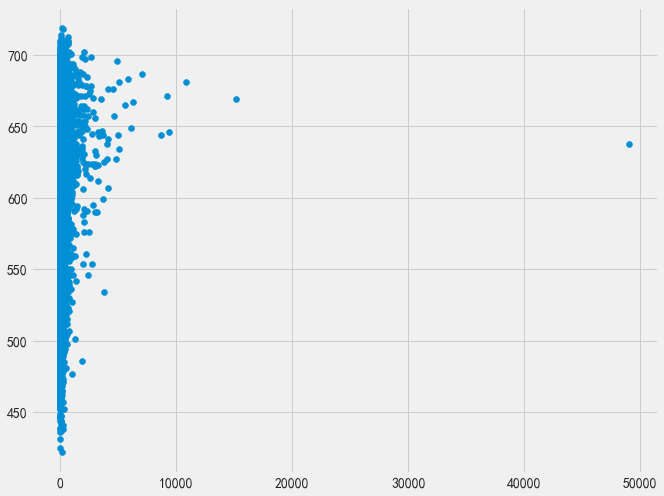

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(x=train['用户当月账户余额（元）'],y=train['信用分'])

## 用户当月账户余额（元）有一个49040的异常值，可以考虑将大于10000的进行异常值处理

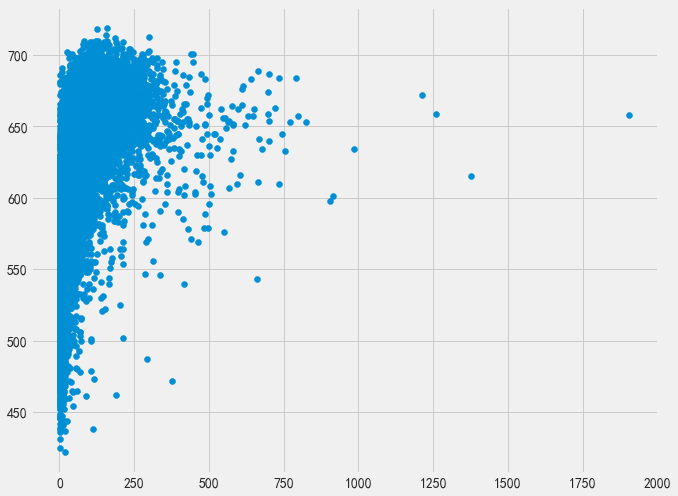

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(x=train['当月通话交往圈人数'],y=train['信用分'])

In [68]:
train['当月通话交往圈人数'].describe()

count    50000.000000
mean        48.054500
std         54.208524
min          1.000000
25%         16.000000
50%         32.000000
75%         61.000000
max       1906.000000
Name: 当月通话交往圈人数, dtype: float64

## 用户画像探索

In [69]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, '信用分']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='信用分', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='信用分', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('信用分', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.rcParams['font.sans-serif']=['SimHei']

    plt.show();
    
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['信用分'] != 0]
    t0 = app_train.loc[app_train['信用分'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [70]:
train[train['用户年龄']<10]['用户年龄'].value_counts()

0    290
9      1
Name: 用户年龄, dtype: int64

plot_stats('是否大学生客户')

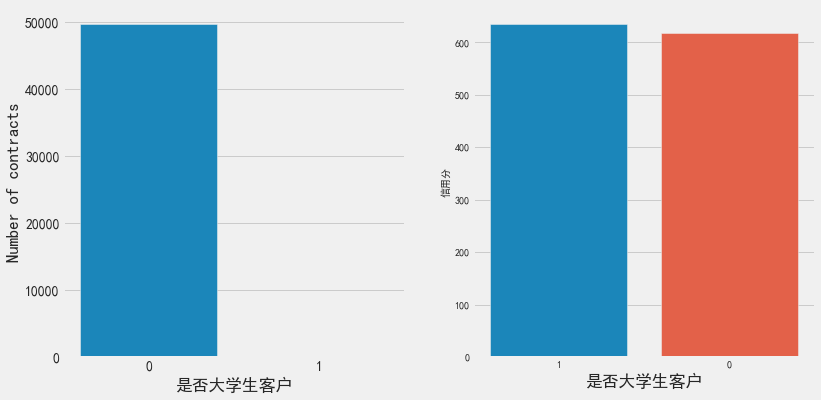

In [71]:
plot_stats('是否大学生客户')

是否大学生客户：大学生客户占比极小，可忽略，大学生平均信用分较高

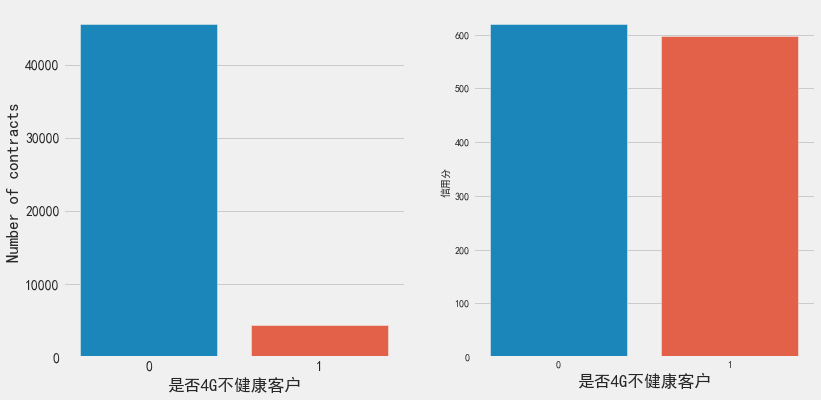

In [72]:
plot_stats('是否4G不健康客户')

是否4G不健康客户：4G健康客户的信用分明显比不健康用户要高

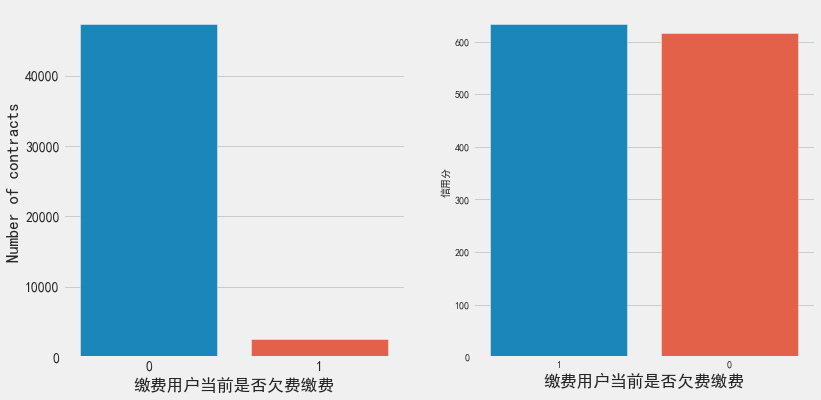

In [73]:
plot_stats('缴费用户当前是否欠费缴费')

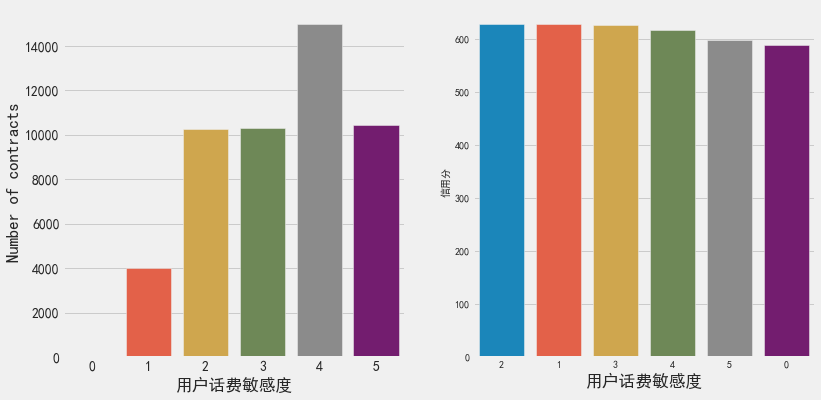

In [74]:
plot_stats('用户话费敏感度')

In [75]:
train['用户话费敏感度'].value_counts()

4    14994
5    10454
3    10283
2    10247
1     4007
0       15
Name: 用户话费敏感度, dtype: int64

其中用户话费敏感度为信用分依次排名为：2>1>3>4>5,213级对信用分的影响差距不大
用户话费敏感度：一级敏感用户占比较少，仅占8%
且含有15个为0的脏数据，后续处理

In [76]:
(train[train['用户话费敏感度']==1]['用户话费敏感度'].count())/(train['用户话费敏感度'].count())*100

8.014000000000001

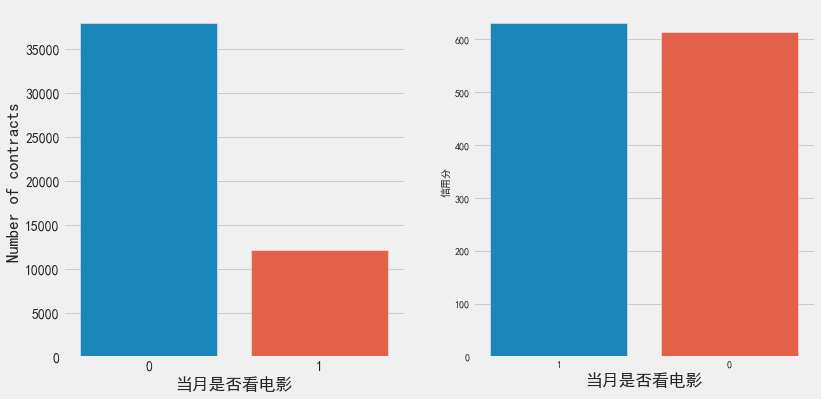

In [77]:
plot_stats('当月是否看电影')

当月是否看电影：看了电影的客户信用分明显比不看的用户要高

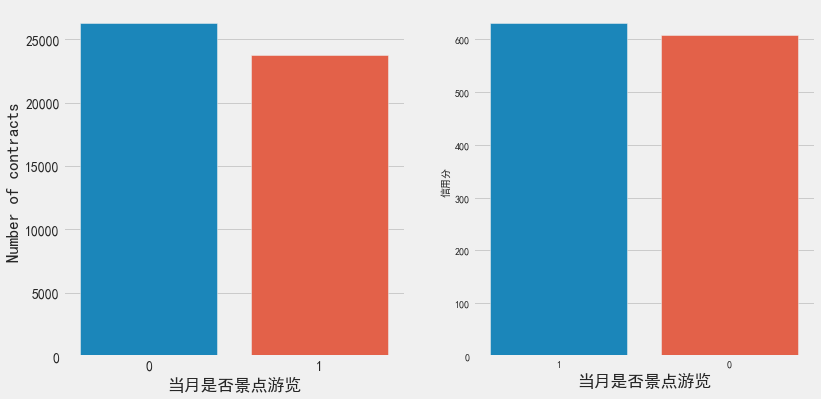

In [78]:
plot_stats('当月是否景点游览')

当月是否景点游览：景点游览的客户信用分明显比不浏览的用户要高，且两者数量接近

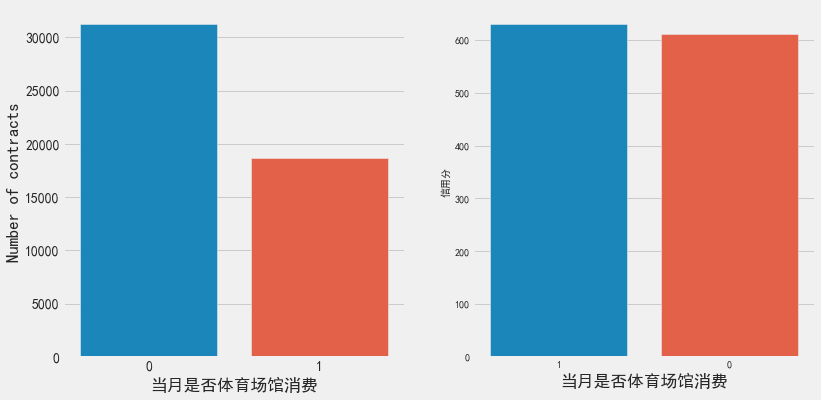

In [79]:
plot_stats('当月是否体育场馆消费')

是否黑名单客户：黑名单客户信用分比较高；缴费用户当前是否欠费缴费：当前欠费用户信用分较高
用户实名制是否通过核实：没通过核实用户占比极小，通过实名制平均信用分较高，影响不明显
是否经常逛商场的人：经常逛商场的人信用分较高，对信用分的影响不明显
当月是否逛过福州仓山万达：逛过万达用户占比极小，逛过万达信用分较高，影响不明显
当月是否到过福州山姆会员店：到过山姆用户占比极小，到过山姆信用分较高，影响不明显
当月是否体育场馆消费：到过消费信用分较高，影响不明显


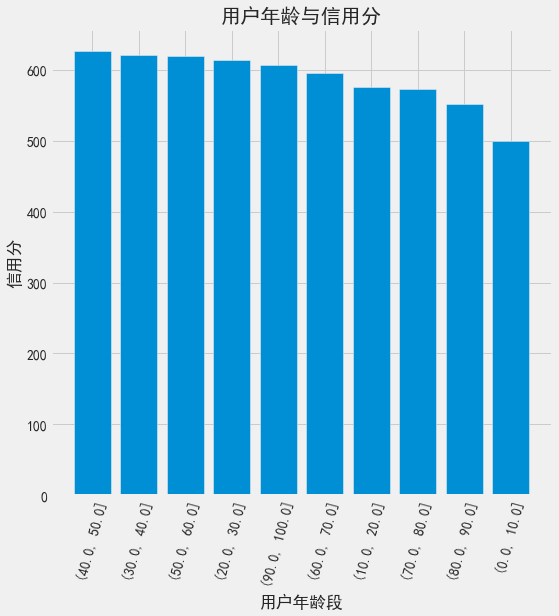

In [80]:
age_data=train[['信用分','用户年龄']]

age_data['用户年龄']=pd.cut(age_data['用户年龄'],bins=np.linspace(0,100,num=11))
age_groups=age_data.groupby('用户年龄').mean().sort_values(by='信用分',ascending=False)

plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str),age_groups['信用分'])
plt.xticks(rotation = 75); plt.xlabel('用户年龄段'); plt.ylabel('信用分')
plt.title('用户年龄与信用分');

In [81]:
def xx(feature):
    print(train[feature].describe())
    plt.figure(figsize=(10,8))
    plt.scatter(x=train[feature],y=train['信用分'])

count    50000.000000
mean        48.054500
std         54.208524
min          1.000000
25%         16.000000
50%         32.000000
75%         61.000000
max       1906.000000
Name: 当月通话交往圈人数, dtype: float64


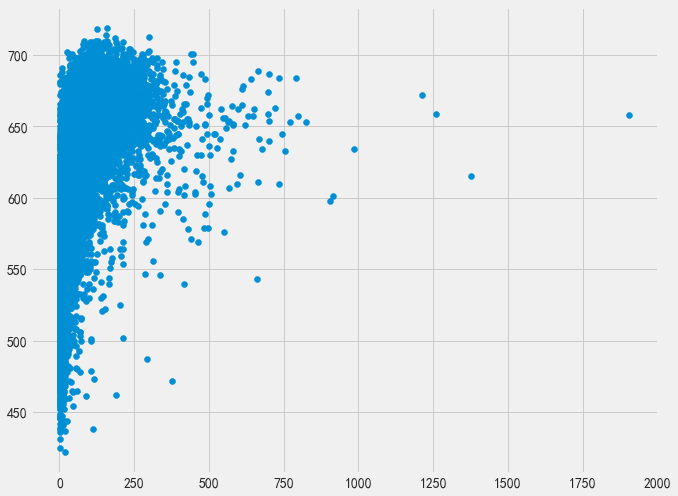

In [82]:
xx('当月通话交往圈人数')

In [83]:
train['当月通话交往圈人数'].value_counts()

11      901
14      877
16      877
19      877
13      871
       ... 
306       1
823       1
503       1
905       1
1375      1
Name: 当月通话交往圈人数, Length: 464, dtype: int64

## 异常值处理

In [84]:
train.loc[train['用户年龄']==0,'用户年龄']=None
train.loc[train['用户年龄']>100,'用户年龄']=None
train.loc[train['用户话费敏感度']==0,'用户话费敏感度']=None
train.loc[train['用户近6个月平均消费值（元）']==0,'用户近6个月平均消费值（元）']=None
train['用户账单当月总费用（元）'].replace({49040:50},inplace=True)

In [85]:
train['用户话费敏感度'].describe()

count    49985.000000
mean         3.352926
std          1.240029
min          1.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: 用户话费敏感度, dtype: float64

## 特征工程

In [86]:
train_copy=train.copy()
test_copy=test.copy()


#用户消费
#train_copy['缴费额频次（元/月）']=train_copy['缴费用户最近一次缴费金额（元）']/train_copy['用户最近一次缴费距今时长（月）']
train_copy['账单的缴费占比']=train_copy['缴费用户最近一次缴费金额（元）']/train_copy['用户账单当月总费用（元）']
train_copy['账单当月与平均水平差值']=train_copy['用户账单当月总费用（元）']-train_copy['用户近6个月平均消费值（元）']
#train_copy['前5月消费值']=6*train_copy['用户近6个月平均消费值（元）']-train_copy['用户账单当月总费用（元）']
train_copy['账单当月与平均水平占比']=train_copy['用户账单当月总费用（元）']/train_copy['用户近6个月平均消费值（元）']

#用户生活
train_copy['次数'] = train_copy[['当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
                   '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数']].sum(axis=1)

train_copy['金融类应用使用占比']=train_copy['当月金融理财类应用使用总次数']/train_copy['次数']
train_copy['当月视频播放类应用使用占比']=train_copy['当月视频播放类应用使用次数']/train_copy['次数']
train_copy['移动线上购物占比']=train_copy['当月网购类应用使用次数']/train_copy['次数']
train_copy['用户网龄/月'] = train_copy['用户网龄（月）'] % 12

#用户出行
train_copy['移动线上出行应用使用占比']=train_copy['当月旅游资讯类应用使用次数']/train_copy['次数']


In [87]:
train_copy.head()

用户编码  用户实名制是否通过核实  用户年龄  是否大学生客户  是否黑名单客户  \
0  a4651f98c82948b186bdcdc8108381b4            1  44.0        0        0   
1  aeb10247db4e4d67b2550bbc42ff9827            1  18.0        0        0   
2  5af23a1e0e77410abb25e9a7eee510aa            1  47.0        0        0   
3  43c64379d3c24a15b8478851b22049e4            1  55.0        0        0   
4  f1687f3b8a6f4910bd0b13eb634056e2            1  40.0        0        0   

   是否4G不健康客户  用户网龄（月）  用户最近一次缴费距今时长（月）  缴费用户最近一次缴费金额（元）  用户近6个月平均消费值（元）  ...  \
0          0      186                1            99.80          163.86  ...   
1          1        5                1            29.94          153.28  ...   
2          0      145                1            49.90          109.64  ...   
3          0      234                1            99.80           92.97  ...   
4          0       76                1            49.90           95.47  ...   

   信用分   账单的缴费占比  账单当月与平均水平差值  账单当月与平均水平占比     次数  金融类应用使用占比  当月视频播放类应用使用占比  \
0  664  0.626884        -4.66     0.971561  10628   0.257810       0.672281   
1  530  0.206340        -8.18     0.946634  48007   0.056888       0.934489   
2  643  0.415141        10.56     1.096315   8196   0.000000       0.586140   
3  649  0.596106        74.45     1.800796   5577   0.346244       0.563206   
4  648  0.494059         5.53     1.057924    645   0.099225       0.091473   

   移动线上购物占比  用户网龄/月  移动线上出行应用使用占比  
0  0.067087       6      0.002823  
1  0.008624       5      0.000000  
2  0.413738       1      0.000122  
3  0.089654       6      0.000897  
4  0.809302       4      0.000000  

[5 rows x 39 columns]

In [88]:
missing_values=missing_values_table(train_copy)
missing_values.head(20)

Your selected dataframe has 39 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
金融类应用使用占比                 5213               10.4
当月视频播放类应用使用占比             5213               10.4
移动线上购物占比                  5213               10.4
移动线上出行应用使用占比              5213               10.4
用户年龄                       312                0.6
账单的缴费占比                     33                0.1
用户话费敏感度                     15                0.0
用户近6个月平均消费值（元）              12                0.0
账单当月与平均水平差值                 12                0.0
账单当月与平均水平占比                 12                0.0

c:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

c:\program files\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



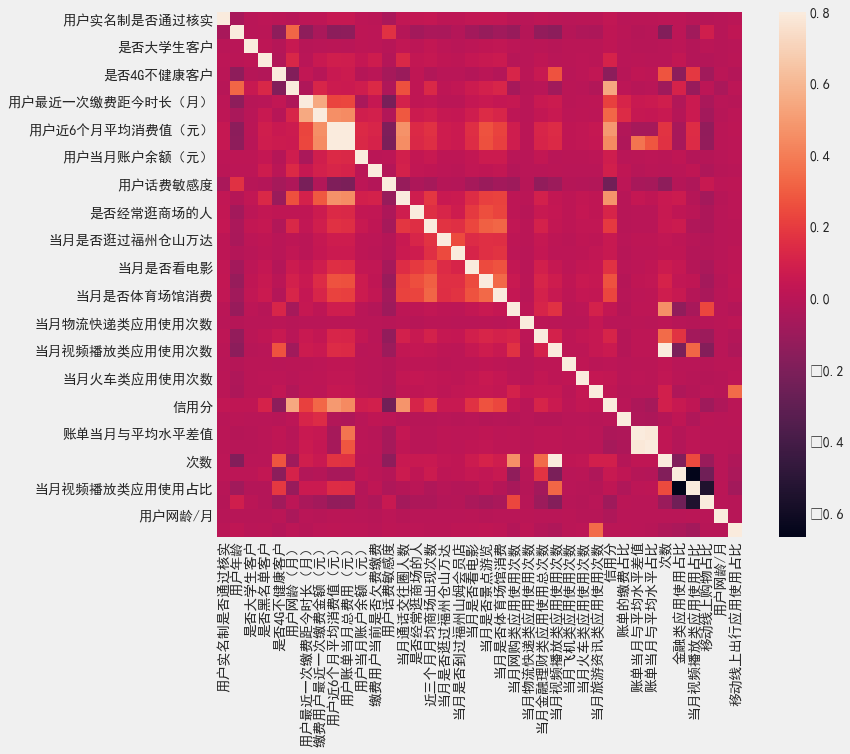

In [89]:
corrmat = train_copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [90]:
k=20
plt.subplots(figsize=(12, 9))
cols=corrmat.nlargest(k,'信用分')['信用分'].index
cm=np.corrcoef(train_copy[cols].values.T)
sns.set(font_scale=1.25)
plt.rcParams['font.sans-serif']=['SimHei']
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Text(0.5, 1.0, '账单的缴费占比')

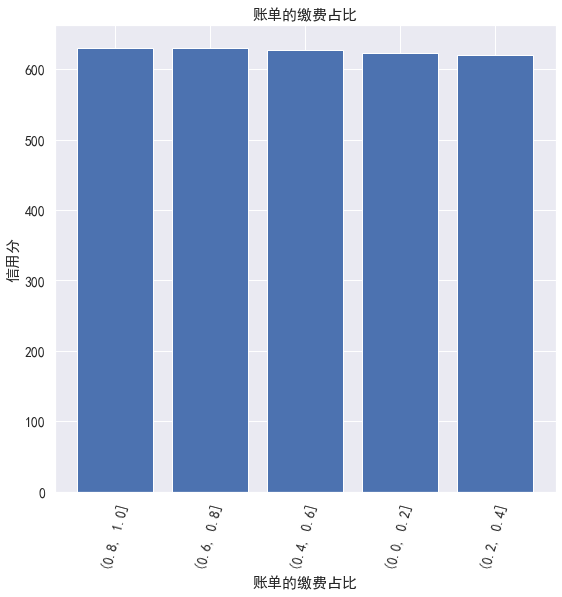

In [91]:
age_data=train_copy[['信用分','账单的缴费占比']]

age_data['账单的缴费占比']=pd.cut(age_data['账单的缴费占比'],bins=np.linspace(0,1,num=6))
age_groups=age_data.groupby('账单的缴费占比').mean().sort_values(by='信用分',ascending=False)

plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str),age_groups['信用分'])
plt.xticks(rotation = 75); plt.xlabel('账单的缴费占比'); plt.ylabel('信用分')
plt.title('账单的缴费占比')

In [92]:
#用户消费
#test_copy['缴费额频次（元/月）']=test_copy['缴费用户最近一次缴费金额（元）']/test_copy['用户最近一次缴费距今时长（月）']
test_copy['账单的缴费占比']=test_copy['缴费用户最近一次缴费金额（元）']/test_copy['用户账单当月总费用（元）']
test_copy['账单当月与平均水平差值']=test_copy['用户账单当月总费用（元）']-test_copy['用户近6个月平均消费值（元）']
#test_copy['前5月消费值']=6*test_copy['用户近6个月平均消费值（元）']-test_copy['用户账单当月总费用（元）']
test_copy['账单当月与平均水平占比']=test_copy['用户账单当月总费用（元）']/test_copy['用户近6个月平均消费值（元）']

#用户生活
test_copy['次数'] = test_copy[['当月网购类应用使用次数', '当月物流快递类应用使用次数', '当月金融理财类应用使用总次数',
                   '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数', '当月旅游资讯类应用使用次数']].sum(axis=1)

test_copy['金融类应用使用占比']=test_copy['当月金融理财类应用使用总次数']/test_copy['次数']
test_copy['当月视频播放类应用使用占比']=test_copy['当月视频播放类应用使用次数']/test_copy['次数']
test_copy['移动线上购物占比']=test_copy['当月网购类应用使用次数']/test_copy['次数']
test_copy['用户网龄/月'] = test_copy['用户网龄（月）'] % 12

#用户出行
test_copy['移动线上出行应用使用占比']=test_copy['当月旅游资讯类应用使用次数']/test_copy['次数']


In [93]:
#test_copy=test_copy.fillna(0)
#train_copy=train_copy.fillna(0)

In [94]:
test_missing_values=missing_values_table(test_copy)
test_missing_values.head(20)

Your selected dataframe has 38 columns.
There are 6 columns that have missing values.


Missing Values  % of Total Values
金融类应用使用占比                5219               10.4
当月视频播放类应用使用占比            5219               10.4
移动线上购物占比                 5219               10.4
移动线上出行应用使用占比             5219               10.4
账单的缴费占比                    38                0.1
账单当月与平均水平占比                16                0.0

In [95]:
train_missing_values=missing_values_table(train_copy)
train_missing_values.head(20)

Your selected dataframe has 39 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
金融类应用使用占比                 5213               10.4
当月视频播放类应用使用占比             5213               10.4
移动线上购物占比                  5213               10.4
移动线上出行应用使用占比              5213               10.4
用户年龄                       312                0.6
账单的缴费占比                     33                0.1
用户话费敏感度                     15                0.0
用户近6个月平均消费值（元）              12                0.0
账单当月与平均水平差值                 12                0.0
账单当月与平均水平占比                 12                0.0

特征筛选，为避免多重共线性问题，下面我们会识别皮尔森相关性系数大于0.8的特征

In [96]:
corr_matrix = train_copy.corr().abs()
corr_matrix.head()

用户实名制是否通过核实      用户年龄   是否大学生客户   是否黑名单客户  是否4G不健康客户   用户网龄（月）  \
用户实名制是否通过核实     1.000000  0.054769  0.002734  0.010247   0.005233  0.007537   
用户年龄            0.054769  1.000000  0.002056  0.004844   0.142494  0.325342   
是否大学生客户         0.002734  0.002056  1.000000  0.015131   0.009800  0.051728   
是否黑名单客户         0.010247  0.004844  0.015131  1.000000   0.020953  0.128051   
是否4G不健康客户       0.005233  0.142494  0.009800  0.020953   1.000000  0.184091   

             用户最近一次缴费距今时长（月）  缴费用户最近一次缴费金额（元）  用户近6个月平均消费值（元）  用户账单当月总费用（元）  \
用户实名制是否通过核实         0.012574         0.019604        0.047398      0.047026   
用户年龄                0.140939         0.049267        0.148343      0.142499   
是否大学生客户             0.007326         0.000438        0.004609      0.002094   
是否黑名单客户             0.001369         0.058296        0.083692      0.079275   
是否4G不健康客户           0.029226         0.003996        0.060026      0.066570   

             ...       信用分   账单的缴费占比  账单当月与平均水平差值  账单当月与平均水平占比        次数  \
用户实名制是否通过核实  ...  0.028927  0.002240     0.006970     0.003265  0.013330   
用户年龄         ...  0.022268  0.005319     0.010181     0.007390  0.185681   
是否大学生客户      ...  0.025312  0.000348     0.005153     0.004533  0.000434   
是否黑名单客户      ...  0.110549  0.001585     0.003578     0.001816  0.002719   
是否4G不健康客户    ...  0.147162  0.007949     0.024791     0.019526  0.275506   

             金融类应用使用占比  当月视频播放类应用使用占比  移动线上购物占比    用户网龄/月  移动线上出行应用使用占比  
用户实名制是否通过核实   0.013003       0.004297  0.010726  0.005901      0.007046  
用户年龄          0.009836       0.077637  0.088489  0.006931      0.021962  
是否大学生客户       0.014330       0.016697  0.005614  0.005018      0.000988  
是否黑名单客户       0.033716       0.019407  0.014781  0.003278      0.005522  
是否4G不健康客户     0.149113       0.191767  0.080302  0.004097      0.018870  

[5 rows x 38 columns]

In [97]:
threshold = 0.6
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

用户实名制是否通过核实      用户年龄   是否大学生客户   是否黑名单客户  是否4G不健康客户   用户网龄（月）  \
用户实名制是否通过核实          NaN  0.054769  0.002734  0.010247   0.005233  0.007537   
用户年龄                 NaN       NaN  0.002056  0.004844   0.142494  0.325342   
是否大学生客户              NaN       NaN       NaN  0.015131   0.009800  0.051728   
是否黑名单客户              NaN       NaN       NaN       NaN   0.020953  0.128051   
是否4G不健康客户            NaN       NaN       NaN       NaN        NaN  0.184091   

             用户最近一次缴费距今时长（月）  缴费用户最近一次缴费金额（元）  用户近6个月平均消费值（元）  用户账单当月总费用（元）  \
用户实名制是否通过核实         0.012574         0.019604        0.047398      0.047026   
用户年龄                0.140939         0.049267        0.148343      0.142499   
是否大学生客户             0.007326         0.000438        0.004609      0.002094   
是否黑名单客户             0.001369         0.058296        0.083692      0.079275   
是否4G不健康客户           0.029226         0.003996        0.060026      0.066570   

             ...       信用分   账单的缴费占比  账单当月与平均水平差值  账单当月与平均水平占比        次数  \
用户实名制是否通过核实  ...  0.028927  0.002240     0.006970     0.003265  0.013330   
用户年龄         ...  0.022268  0.005319     0.010181     0.007390  0.185681   
是否大学生客户      ...  0.025312  0.000348     0.005153     0.004533  0.000434   
是否黑名单客户      ...  0.110549  0.001585     0.003578     0.001816  0.002719   
是否4G不健康客户    ...  0.147162  0.007949     0.024791     0.019526  0.275506   

             金融类应用使用占比  当月视频播放类应用使用占比  移动线上购物占比    用户网龄/月  移动线上出行应用使用占比  
用户实名制是否通过核实   0.013003       0.004297  0.010726  0.005901      0.007046  
用户年龄          0.009836       0.077637  0.088489  0.006931      0.021962  
是否大学生客户       0.014330       0.016697  0.005614  0.005018      0.000988  
是否黑名单客户       0.033716       0.019407  0.014781  0.003278      0.005522  
是否4G不健康客户     0.149113       0.191767  0.080302  0.004097      0.018870  

[5 rows x 38 columns]

In [98]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)

There are 4 columns to remove.
['用户账单当月总费用（元）', '账单当月与平均水平占比', '次数', '当月视频播放类应用使用占比']


In [99]:
import datetime
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [100]:
for col in train_copy.columns:
    if col.find('code') >= 0:
        train_copy[col] = train_copy[col].astype(np.int8)
    elif train_copy[col].dtype == 'float64':
        train_copy[col] = train_copy[col].astype(np.float32)
    elif train_copy[col].dtype == 'int64':
        train_copy[col] = train_copy[col].astype(np.int16)
        

train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   用户编码             50000 non-null  object 
 1   用户实名制是否通过核实      50000 non-null  int16  
 2   用户年龄             49688 non-null  float32
 3   是否大学生客户          50000 non-null  int16  
 4   是否黑名单客户          50000 non-null  int16  
 5   是否4G不健康客户        50000 non-null  int16  
 6   用户网龄（月）          50000 non-null  int16  
 7   用户最近一次缴费距今时长（月）  50000 non-null  int16  
 8   缴费用户最近一次缴费金额（元）  50000 non-null  float32
 9   用户近6个月平均消费值（元）   49988 non-null  float32
 10  用户账单当月总费用（元）     50000 non-null  float32
 11  用户当月账户余额（元）      50000 non-null  int16  
 12  缴费用户当前是否欠费缴费     50000 non-null  int16  
 13  用户话费敏感度          49985 non-null  float32
 14  当月通话交往圈人数        50000 non-null  int16  
 15  是否经常逛商场的人        50000 non-null  int16  
 16  近三个月月均商场出现次数     50000 non-null  int16  
 17  当月是否逛过福州仓山万达

In [101]:
train_ids = train_copy['用户编码']
test_ids = test_copy['用户编码']

train_set = train_copy.drop(columns = ['用户编码', '信用分'])
test_set = test_copy.drop(columns = ['用户编码'])

In [102]:
x,y=train_set,train_copy['信用分'].values

In [103]:
x_train,x_validate,y_train,y_validate=train_test_split(x,y,test_size=0.2,random_state=0)

In [104]:
x_train=x_train.values

In [105]:
x_train

array([[1.0000000e+00, 6.8000000e+01, 0.0000000e+00, ...,           nan,
        3.0000000e+00,           nan],
       [1.0000000e+00, 4.5000000e+01, 0.0000000e+00, ...,           nan,
        2.0000000e+00,           nan],
       [1.0000000e+00, 4.2000000e+01, 0.0000000e+00, ..., 4.8837209e-01,
        2.0000000e+00, 4.6511628e-02],
       ...,
       [1.0000000e+00, 2.8000000e+01, 0.0000000e+00, ..., 2.7703437e-01,
        5.0000000e+00, 3.1118718e-04],
       [1.0000000e+00, 3.7000000e+01, 0.0000000e+00, ..., 1.3717864e-01,
        7.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.3000000e+01, 0.0000000e+00, ..., 7.8253424e-01,
        1.1000000e+01, 0.0000000e+00]], dtype=float32)

In [106]:
x_validate=x_validate.values

In [107]:
x_validate

array([[1.0000000e+00, 4.3000000e+01, 0.0000000e+00, ..., 3.7890625e-01,
        5.0000000e+00, 8.3007812e-02],
       [1.0000000e+00, 3.3000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        3.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 4.8000000e+01, 0.0000000e+00, ..., 1.2019518e-01,
        5.0000000e+00, 9.0619400e-03],
       ...,
       [1.0000000e+00, 1.9000000e+01, 0.0000000e+00, ..., 1.1865307e-01,
        7.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.9000000e+01, 0.0000000e+00, ..., 1.2497313e-01,
        1.0000000e+01, 1.4530759e-02],
       [1.0000000e+00, 3.3000000e+01, 0.0000000e+00, ..., 3.7540630e-01,
        1.0000000e+01, 4.3336945e-03]], dtype=float32)

In [108]:
import gc
del train_copy
gc.collect()

21201

In [109]:
train_data = lgb.Dataset(data=x_train, label=y_train)
validate_data = lgb.Dataset(data=x_validate, label=y_validate)


In [110]:
import time
ts = time.time()
params = {"objective" : "regression", "metric" : "rmse", 'n_estimators':10000, 'early_stopping_rounds':50,
              "num_leaves" : 200, "learning_rate" : 0.01, "bagging_fraction" : 0.9,
             "feature_fraction" : 0.3, "bagging_seed" : 0}
#params = {"num_leaves":32, "reg_alpha":0, "reg_lambda":0.01, "objective":"mse", "metric":"rmse",
#          "max_depth":-1, "learning_rate":0.01, "min_child_samples":50,
#          "n_estimators":15000, "subsample":0.7, "colsample_bytree":0.45, "subsample_freq":5
#          }
print('Start....', ts)
lgb_model = lgb.train(params, train_data, valid_sets=[train_data, validate_data], verbose_eval=1000) 
print('End...', time.time() - ts)

Start.... 1599028124.810499


c:\program files\python37\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

c:\program files\python37\lib\site-packages\lightgbm\engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument



Training until validation scores don't improve for 50 rounds
[1000]	training's rmse: 14.0314	valid_1's rmse: 19.3559
Early stopping, best iteration is:
[1351]	training's rmse: 12.8743	valid_1's rmse: 19.3234
End... 28.051604747772217


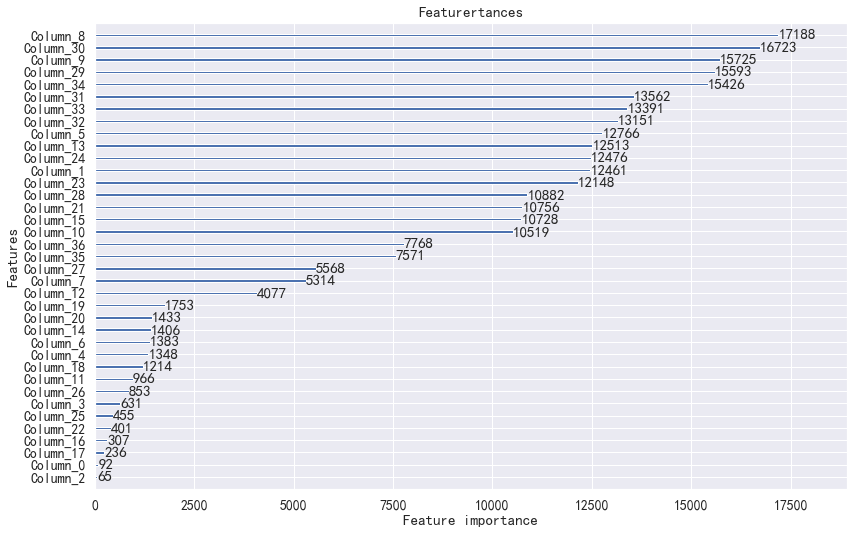

In [111]:
lgb.plot_importance(lgb_model, max_num_features=40, figsize=(12, 8))
plt.title("Featurertances")
plt.show()

In [112]:
Y_test = lgb_model.predict(test_set)

In [113]:
Y_test=np.around(Y_test)
Y_test

array([601., 525., 666., ..., 553., 542., 563.])

In [114]:
result = pd.DataFrame(columns = ["id", " score"])
result['id']=test_ids
result[' score']=Y_test

In [115]:
result.to_csv('result8.csv',encoding='utf-8',index=False)